<a href="https://colab.research.google.com/github/AnwarMirza/SEP740-Deep-Learning-McMaster-Summer2023/blob/main/10Time_Series_forecasting_with_LSTM02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary packages

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


Load climate data ([Jena Climate Data](https://www.bgc-jena.mpg.de/wetter/)).

Jena Climate is weather timeseries dataset recorded at the Weather Station of the Max Planck Institute for Biogeochemistry in Jena, Germany.

Jena Climate dataset is made up of 14 different quantities (such air temperature, atmospheric pressure, humidity, wind direction, and so on) were recorded every 10 minutes, over several years. This dataset covers data from January 1st 2009 to December 31st 2016.

In [ ]:
zipFile = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)

13568290/13568290 [==============================] - 0s 0us/step


Convert the zipped file in csv file

In [ ]:
csvFile, _ = os.path.splitext(zipFile)

Read the data from the cvs file into a panada data frame

In [ ]:
df = pd.read_csv(csvFile)
df.head(), df.tail()
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


Index the data using date time stamp

In [ ]:
df['datetime'] = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df = df.set_index('datetime')
df.drop(['Date Time'], axis=1, inplace=True)
df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
datetime,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
2016-12-31 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
2016-12-31 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2


Normalize the data using scikit-learn's `preprocessing.MinMaxScaler()` function. The `MinMaxScaler()` function scales each feature individually so that the values between minimum and maximum values are scaled to 0 to 1.

The formula to scale feature values is
$$
x_{norm} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d, columns=df.columns)
scaled_df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,0.814939,0.248632,0.243662,0.334788,0.923033,0.037886,0.084272,0.004782,0.081679,0.082798,0.743213,0.997262,0.997830,0.423056
1,0.815430,0.242163,0.237241,0.326891,0.924182,0.036294,0.081003,0.004564,0.078843,0.079586,0.749349,0.997231,0.997805,0.378056
2,0.815037,0.240504,0.235594,0.326268,0.929925,0.035976,0.080639,0.004347,0.078276,0.079229,0.750666,0.997178,0.997718,0.476667
3,0.814840,0.243822,0.239052,0.331255,0.933372,0.036772,0.082819,0.004130,0.080545,0.081370,0.747523,0.997193,0.997705,0.550000
4,0.814840,0.244485,0.239546,0.331879,0.932223,0.036931,0.083182,0.004130,0.080545,0.081727,0.746954,0.997191,0.997718,0.595278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,0.849828,0.314480,0.304577,0.350790,0.690982,0.056829,0.091173,0.026516,0.088486,0.089222,0.699003,0.997226,0.997807,0.666667
420547,0.848452,0.326091,0.316266,0.352244,0.652039,0.060809,0.091900,0.031298,0.089053,0.089936,0.688407,0.997272,0.997847,0.650833
420548,0.847371,0.329242,0.319559,0.349127,0.631361,0.061923,0.090447,0.033688,0.087918,0.088508,0.685264,0.997267,0.997855,0.597778
420549,0.847273,0.311494,0.301943,0.342477,0.676048,0.055874,0.087541,0.027385,0.084515,0.085653,0.700739,0.997307,0.997871,0.627222


We shall use only the hourly data. So, starting from fifth row, only keep every sixeth row from the data frame

In [ ]:
scaled_df = scaled_df[5::6]
scaled_df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,0.814742,0.248134,0.243332,0.337282,0.935669,0.037886,0.085361,0.004130,0.082813,0.083869,0.743542,0.997180,0.997718,0.535278
11,0.815921,0.234367,0.229503,0.316708,0.921884,0.034543,0.076644,0.004564,0.074305,0.075303,0.756682,0.997184,0.997718,0.528611
17,0.818084,0.235528,0.230326,0.318994,0.925330,0.034702,0.077733,0.004347,0.075440,0.076374,0.756473,0.997177,0.997718,0.464444
23,0.819558,0.231548,0.226210,0.311513,0.914991,0.033747,0.074827,0.004999,0.072604,0.073162,0.760753,0.997169,0.997693,0.666667
29,0.824177,0.221927,0.216003,0.298421,0.910396,0.031678,0.069742,0.004999,0.067499,0.068166,0.771469,0.997199,0.997743,0.436111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,0.870565,0.365401,0.352486,0.408354,0.678346,0.075454,0.119869,0.034558,0.115712,0.117059,0.662247,0.997246,0.997791,0.529444
420527,0.862899,0.358434,0.346724,0.377598,0.612751,0.072588,0.103887,0.040426,0.100397,0.101713,0.665749,0.997261,0.997847,0.626111
420533,0.860835,0.336042,0.324662,0.376351,0.688685,0.064311,0.103523,0.029341,0.099830,0.100999,0.684157,0.997230,0.997811,0.440833
420539,0.855528,0.333720,0.323016,0.371155,0.681792,0.063356,0.100981,0.029776,0.097561,0.098858,0.684187,0.997194,0.997723,0.601944


Plot the temperature

<Axes: >

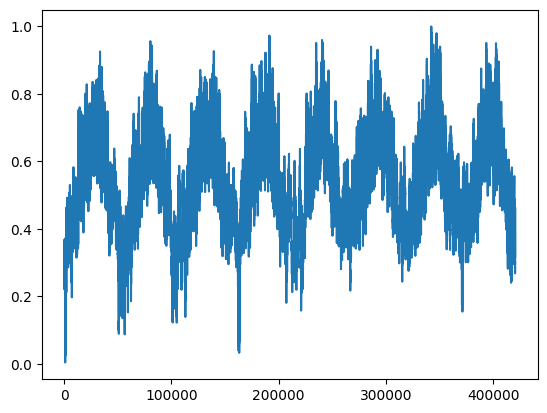

In [ ]:
temp = scaled_df['T (degC)']
temp.plot()

Check the shape of temp

In [ ]:
temp.head(), temp.tail(), temp.shape

(5     0.248134
 11    0.234367
 17    0.235528
 23    0.231548
 29    0.221927
 Name: T (degC), dtype: float64,
 420521    0.365401
 420527    0.358434
 420533    0.336042
 420539    0.333720
 420545    0.316470
 Name: T (degC), dtype: float64,
 (70091,))

Divide the data into training, validation and testing data sets

In [ ]:
train = temp[:60000]
valid = temp[60000:65000]
test  = temp[65000:]
train, valid, test

(5         0.248134
 11        0.234367
 17        0.235528
 23        0.231548
 29        0.221927
             ...   
 359975    0.388953
 359981    0.391773
 359987    0.415160
 359993    0.419307
 359999    0.459778
 Name: T (degC), Length: 60000, dtype: float64,
 360005    0.482335
 360011    0.545530
 360017    0.606071
 360023    0.637585
 360029    0.639410
             ...   
 389975    0.717864
 389981    0.718859
 389987    0.717864
 389993    0.734782
 389999    0.687345
 Name: T (degC), Length: 5000, dtype: float64,
 390005    0.684691
 390011    0.677724
 390017    0.657821
 390023    0.644551
 390029    0.631946
             ...   
 420521    0.365401
 420527    0.358434
 420533    0.336042
 420539    0.333720
 420545    0.316470
 Name: T (degC), Length: 5091, dtype: float64)

Prepare the data such that last WS values predict the (WS+1)th value. For example for WS = 5, the first few training patterns will be as follow:

|   Input data sequence ($X$)    | Output ($y$) |
| ------------------------- | ------ |
| $x_1, x_2, x_3, x_4, x_5$ | $x_6$  |
| $x_2, x_3, x_4, x_5, x_6$ | $x_7$  |
| $x_3, x_4, x_5, x_6, x_7$ | $x_8$  |
| $\ \vdots, \ \vdots, \,\ \vdots, \,\ \vdots, \;\ \vdots$ | $\vdots$  |

To convert our dataframe, we define the following function

In [ ]:
def df2Xy(df, windowSize=5):
  dfNumpy = df.to_numpy()
  X, y = [], []
  for i in range(len(dfNumpy)-windowSize):
    # inputs: X rows
    # form a row of X with starting index i from dfNumpy
    row = [[a] for a in dfNumpy[i:i+windowSize]]
    X.append(row)
    # outputs: y labels
    label = dfNumpy[i+windowSize]
    y.append(label)
  return (np.array(X), np.array(y))

Use the function df2Xy to prepare the dataset:

In [ ]:
WINDOW_SIZE = 5
Xtrain, yTrain = df2Xy(train, WINDOW_SIZE)
Xvalid, yValid = df2Xy(valid, WINDOW_SIZE)
Xtest, yTest = df2Xy(test, WINDOW_SIZE)

Xtrain.shape, Xvalid.shape, Xtest.shape, yTrain.shape, yValid.shape, yTest.shape

((59995, 5, 1), (4995, 5, 1), (5086, 5, 1), (59995,), (4995,), (5086,))

Prepare the model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [ ]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(LSTM(64))
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=['acc']) #metrics=[RootMeanSquaredError()])

In [ ]:
history2 = model2.fit(Xtrain, yTrain, validation_data=(Xvalid, yValid), epochs=50, callbacks=[cp2])

Epoch 1/50
1873/1875 [============================>.] - ETA: 0s - loss: 6.7638e-04 - acc: 1.6684e-05

1875/1875 [==============================] - 9s 5ms/step - loss: 6.7600e-04 - acc: 1.6668e-05 - val_loss: 3.1774e-04 - val_acc: 0.0000e+00
Epoch 2/50
1864/1875 [============================>.] - ETA: 0s - loss: 3.6374e-04 - acc: 1.6765e-05

1875/1875 [==============================] - 10s 5ms/step - loss: 3.6373e-04 - acc: 1.6668e-05 - val_loss: 2.4608e-04 - val_acc: 0.0000e+00
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 3.2662e-04 - acc: 1.6668e-05 - val_loss: 2.5403e-04 - val_acc: 0.0000e+00
Epoch 4/50
1863/1875 [============================>.] - ETA: 0s - loss: 3.0483e-04 - acc: 1.6774e-05

1875/1875 [==============================] - 10s 5ms/step - loss: 3.0471e-04 - acc: 1.6668e-05 - val_loss: 2.1074e-04 - val_acc: 0.0000e+00
Epoch 5/50
1874/1875 [============================>.] - ETA: 0s - loss: 2.8161e-04 - acc: 1.6676e-05

1875/1875 [==============================] - 11s 6ms/step - loss: 2.8159e-04 - acc: 1.6668e-05 - val_loss: 2.0513e-04 - val_acc: 0.0000e+00
Epoch 6/50
1872/1875 [============================>.] - ETA: 0s - loss: 2.6526e-04 - acc: 1.6693e-05

1875/1875 [==============================] - 10s 5ms/step - loss: 2.6520e-04 - acc: 1.6668e-05 - val_loss: 1.8433e-04 - val_acc: 0.0000e+00
Epoch 7/50
1873/1875 [============================>.] - ETA: 0s - loss: 2.4550e-04 - acc: 1.6684e-05

1875/1875 [==============================] - 10s 5ms/step - loss: 2.4553e-04 - acc: 1.6668e-05 - val_loss: 1.7614e-04 - val_acc: 0.0000e+00
Epoch 8/50
1873/1875 [============================>.] - ETA: 0s - loss: 2.3346e-04 - acc: 1.6684e-05

1875/1875 [==============================] - 10s 5ms/step - loss: 2.3347e-04 - acc: 1.6668e-05 - val_loss: 1.7203e-04 - val_acc: 0.0000e+00
Epoch 9/50
1864/1875 [============================>.] - ETA: 0s - loss: 2.2023e-04 - acc: 1.6765e-05

1875/1875 [==============================] - 10s 5ms/step - loss: 2.1992e-04 - acc: 1.6668e-05 - val_loss: 1.5460e-04 - val_acc: 0.0000e+00
Epoch 10/50
1866/1875 [============================>.] - ETA: 0s - loss: 2.1238e-04 - acc: 1.6747e-05

1875/1875 [==============================] - 11s 6ms/step - loss: 2.1219e-04 - acc: 1.6668e-05 - val_loss: 1.5032e-04 - val_acc: 0.0000e+00
Epoch 11/50
1875/1875 [==============================] - 7s 4ms/step - loss: 2.0615e-04 - acc: 1.6668e-05 - val_loss: 1.5301e-04 - val_acc: 0.0000e+00
Epoch 12/50
1875/1875 [==============================] - 9s 5ms/step - loss: 2.0113e-04 - acc: 1.6668e-05 - val_loss: 1.6474e-04 - val_acc: 0.0000e+00
Epoch 13/50
1875/1875 [==============================] - 8s 4ms/step - loss: 1.9928e-04 - acc: 1.6668e-05 - val_loss: 1.6360e-04 - val_acc: 0.0000e+00
Epoch 14/50
1872/1875 [============================>.] - ETA: 0s - loss: 1.9872e-04 - acc: 1.6693e-05

1875/1875 [==============================] - 11s 6ms/step - loss: 1.9878e-04 - acc: 1.6668e-05 - val_loss: 1.4217e-04 - val_acc: 0.0000e+00
Epoch 15/50
1860/1875 [============================>.] - ETA: 0s - loss: 1.9664e-04 - acc: 1.6801e-05

1875/1875 [==============================] - 12s 6ms/step - loss: 1.9635e-04 - acc: 1.6668e-05 - val_loss: 1.4207e-04 - val_acc: 0.0000e+00
Epoch 16/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.9845e-04 - acc: 1.6668e-05 - val_loss: 1.4823e-04 - val_acc: 0.0000e+00
Epoch 17/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.9606e-04 - acc: 1.6668e-05 - val_loss: 1.4225e-04 - val_acc: 0.0000e+00
Epoch 18/50
1871/1875 [============================>.] - ETA: 0s - loss: 1.9584e-04 - acc: 1.6702e-05

1875/1875 [==============================] - 10s 5ms/step - loss: 1.9595e-04 - acc: 1.6668e-05 - val_loss: 1.4128e-04 - val_acc: 0.0000e+00
Epoch 19/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.9632e-04 - acc: 1.6668e-05 - val_loss: 1.5993e-04 - val_acc: 0.0000e+00
Epoch 20/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.9477e-04 - acc: 1.6668e-05 - val_loss: 1.4502e-04 - val_acc: 0.0000e+00
Epoch 21/50
1860/1875 [============================>.] - ETA: 0s - loss: 1.9684e-04 - acc: 1.6801e-05

1875/1875 [==============================] - 11s 6ms/step - loss: 1.9663e-04 - acc: 1.6668e-05 - val_loss: 1.4127e-04 - val_acc: 0.0000e+00
Epoch 22/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.9373e-04 - acc: 1.6668e-05 - val_loss: 1.4417e-04 - val_acc: 0.0000e+00
Epoch 23/50
1875/1875 [==============================] - 8s 4ms/step - loss: 1.9426e-04 - acc: 1.6668e-05 - val_loss: 1.4166e-04 - val_acc: 0.0000e+00
Epoch 24/50
1875/1875 [==============================] - 8s 4ms/step - loss: 1.9455e-04 - acc: 1.6668e-05 - val_loss: 1.4297e-04 - val_acc: 0.0000e+00
Epoch 25/50
1875/1875 [==============================] - ETA: 0s - loss: 1.9384e-04 - acc: 1.6668e-05

1875/1875 [==============================] - 12s 6ms/step - loss: 1.9384e-04 - acc: 1.6668e-05 - val_loss: 1.4004e-04 - val_acc: 0.0000e+00
Epoch 26/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.9345e-04 - acc: 1.6668e-05 - val_loss: 1.4300e-04 - val_acc: 0.0000e+00
Epoch 27/50
1875/1875 [==============================] - 8s 4ms/step - loss: 1.9314e-04 - acc: 1.6668e-05 - val_loss: 1.4128e-04 - val_acc: 0.0000e+00
Epoch 28/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.9230e-04 - acc: 1.6668e-05 - val_loss: 1.4361e-04 - val_acc: 0.0000e+00
Epoch 29/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.9300e-04 - acc: 1.6668e-05 - val_loss: 1.4029e-04 - val_acc: 0.0000e+00
Epoch 30/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.9267e-04 - acc: 1.6668e-05 - val_loss: 1.7135e-04 - val_acc: 0.0000e+00
Epoch 31/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.9375e-04 - acc: 1.6668e-05

1875/1875 [==============================] - 10s 5ms/step - loss: 1.9227e-04 - acc: 1.6668e-05 - val_loss: 1.3925e-04 - val_acc: 0.0000e+00
Epoch 34/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.9276e-04 - acc: 1.6668e-05 - val_loss: 1.4008e-04 - val_acc: 0.0000e+00
Epoch 35/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.9230e-04 - acc: 1.6668e-05 - val_loss: 1.3974e-04 - val_acc: 0.0000e+00
Epoch 36/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.9108e-04 - acc: 1.6668e-05 - val_loss: 1.4013e-04 - val_acc: 0.0000e+00
Epoch 37/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.9201e-04 - acc: 1.6668e-05 - val_loss: 1.5725e-04 - val_acc: 0.0000e+00
Epoch 38/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.8993e-04 - acc: 1.6668e-05 - val_loss: 1.4666e-04 - val_acc: 0.0000e+00
Epoch 39/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.9172e-04 - acc: 1.6668e-05

1875/1875 [==============================] - 11s 6ms/step - loss: 1.9057e-04 - acc: 1.6668e-05 - val_loss: 1.3856e-04 - val_acc: 0.0000e+00
Epoch 41/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.9096e-04 - acc: 1.6668e-05 - val_loss: 1.4044e-04 - val_acc: 0.0000e+00
Epoch 42/50
1875/1875 [==============================] - 8s 4ms/step - loss: 1.9092e-04 - acc: 1.6668e-05 - val_loss: 1.4975e-04 - val_acc: 0.0000e+00
Epoch 43/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.8994e-04 - acc: 1.6668e-05 - val_loss: 1.4001e-04 - val_acc: 0.0000e+00
Epoch 44/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.9045e-04 - acc: 1.6668e-05 - val_loss: 1.3997e-04 - val_acc: 0.0000e+00
Epoch 45/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.9054e-04 - acc: 1.6668e-05 - val_loss: 1.4292e-04 - val_acc: 0.0000e+00
Epoch 46/50
1875/1875 [==============================] - 8s 4ms/step - loss: 1.8914e-04 - acc: 1.6668e-05

1875/1875 [==============================] - 15s 8ms/step - loss: 1.8984e-04 - acc: 1.6668e-05 - val_loss: 1.3844e-04 - val_acc: 0.0000e+00
Epoch 49/50
1875/1875 [==============================] - 9s 5ms/step - loss: 1.8933e-04 - acc: 1.6668e-05 - val_loss: 1.4520e-04 - val_acc: 0.0000e+00
Epoch 50/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.8973e-04 - acc: 1.6668e-05 - val_loss: 1.3953e-04 - val_acc: 0.0000e+00


In [ ]:
def plot_loss(history, miny=None):
  loss = history.history['loss']
  test_loss = history.history['val_loss']
  epochs = range(len(loss))
  plt.plot(epochs, loss)
  plt.plot(epochs, test_loss)
  if miny:
    plt.ylim(miny, 1.0)
  plt.title('Loss')
  plt.grid()
  plt.figure()

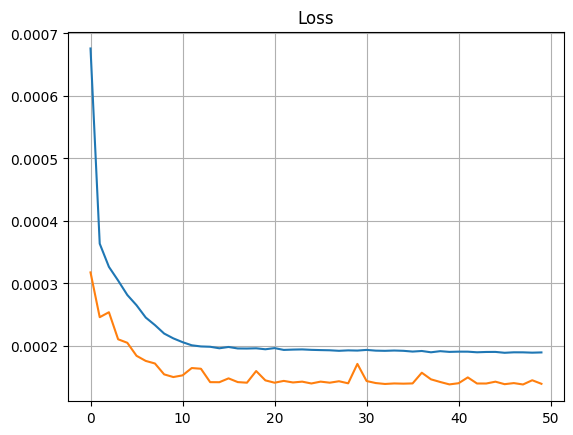

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_loss(history2, miny=0.)

In [ ]:
from tensorflow.keras.models import load_model
model2 = load_model('model2/')

In [ ]:
train_predictions = model2.predict(Xtrain).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':yTrain})
train_results

1875/1875 [==============================] - 3s 1ms/step


,Train Predictions,Actuals
0,0.218682,0.221264
1,0.219888,0.229557
2,0.232793,0.247305
3,0.256136,0.254603
4,0.261992,0.264886
...,...,...
59990,0.409728,0.388953
59991,0.387525,0.391773
59992,0.392344,0.415160
59993,0.426100,0.419307


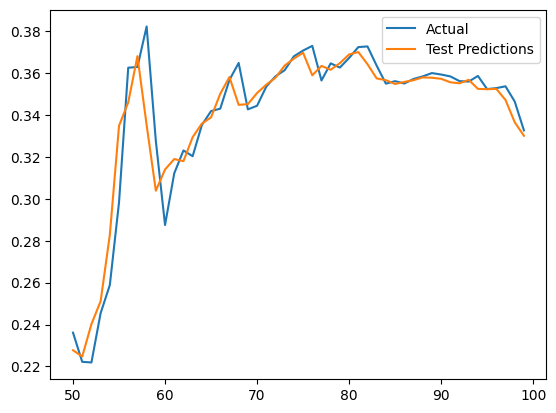

In [ ]:
plt.plot(train_results['Train Predictions'][50:100], label='Actual')
plt.plot(train_results['Actuals'][50:100], label='Test Predictions' )
plt.legend()

In [ ]:
val_predictions = model2.predict(Xvalid).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':yValid})
val_results

157/157 [==============================] - 0s 2ms/step


,Val Predictions,Actuals
0,0.643375,0.614198
1,0.599427,0.608393
2,0.598821,0.585172
3,0.571033,0.567258
4,0.553716,0.561619
...,...,...
4990,0.721060,0.717864
4991,0.713921,0.718859
4992,0.713865,0.717864
4993,0.711969,0.734782


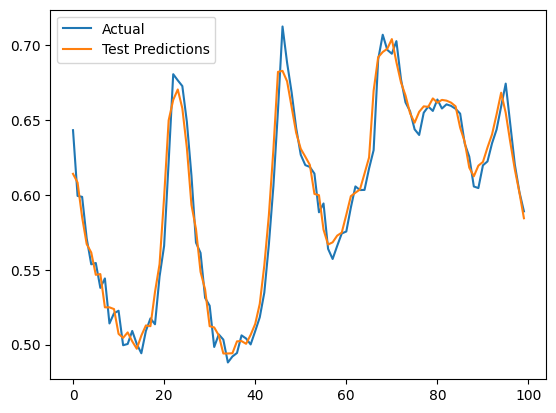

In [ ]:
plt.plot(val_results['Val Predictions'][:100], label='Actual')
plt.plot(val_results['Actuals'][:100], label='Test Predictions' )
plt.legend()

In [ ]:
test_predictions = model2.predict(Xtest).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':yTest})
test_results

159/159 [==============================] - 0s 1ms/step


,Test Predictions,Actuals
0,0.620652,0.613700
1,0.600435,0.604910
2,0.595549,0.596119
3,0.588548,0.587826
4,0.580880,0.583513
...,...,...
5081,0.359333,0.365401
5082,0.357387,0.358434
5083,0.354420,0.336042
5084,0.326914,0.333720


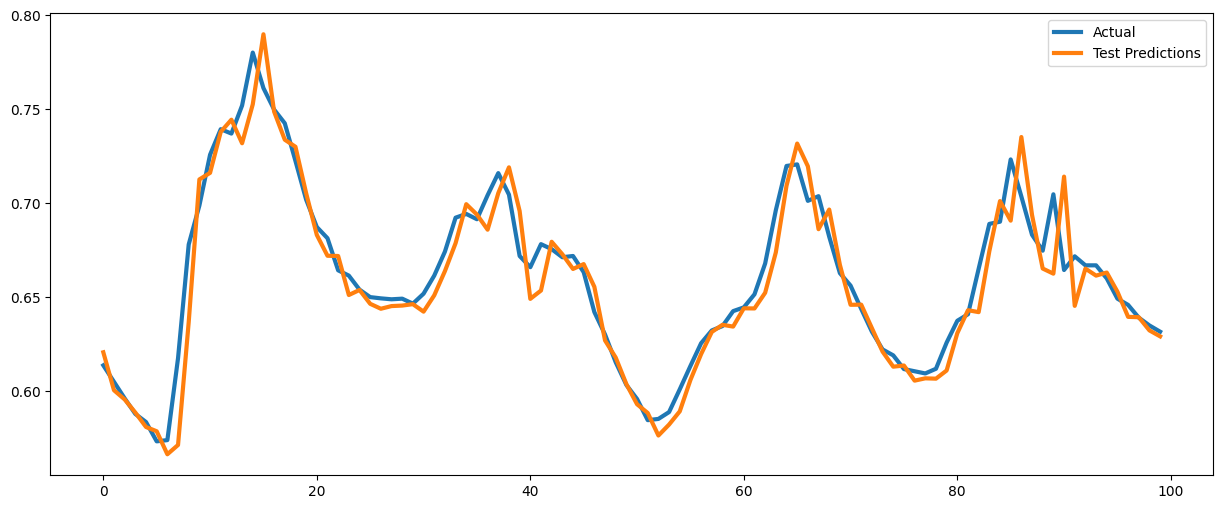

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(test_results['Actuals'][:100], label='Actual', linewidth=3)
plt.plot(test_results['Test Predictions'][:100], label='Test Predictions', alpha=1.0, linewidth=3)
plt.legend()